In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from pycaret.time_series import *

from sktime.forecasting.model_selection import SlidingWindowSplitter


stocks = pd.read_pickle("../Datas/['AAPL', 'BABA', 'XOM', 'GIS', 'LLY'].pkl")
stocks.head()

,AAPL,BABA,GIS,LLY,XOM
Date,,,,,
2021-03-23,121.082520,237.669998,57.611172,178.665512,50.497383
2021-03-24,118.661636,229.589996,55.191486,175.251328,51.521591
2021-03-25,119.155685,222.720001,56.048260,178.091614,51.375278
2021-03-26,119.768318,227.259995,57.404037,180.251038,52.774418
2021-03-29,119.946175,231.860001,58.835136,181.252884,52.490936


## Indexing

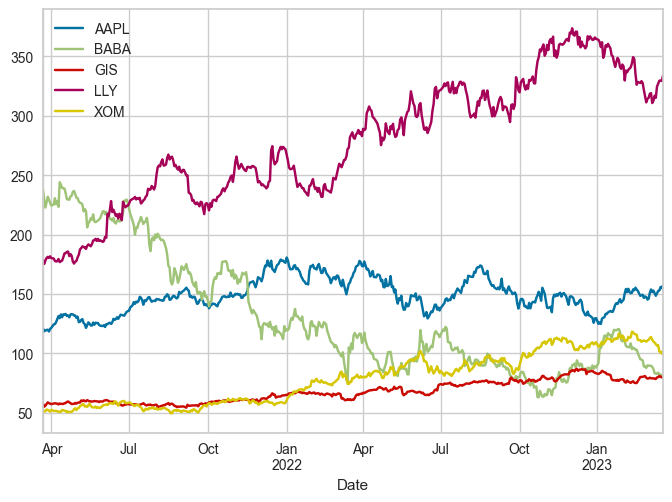

In [2]:
stocks.index = pd.to_datetime(stocks.index).to_period('B')
stocks.plot()
df = stocks['XOM']

#### Reindexing dates

In [3]:
idx = pd.period_range(min(df.index), max(df.index))
df.index.symmetric_difference(idx)
df = df.reindex(idx, fill_value=np.nan)
df = df.fillna(method = 'ffill')


### Setup for pycaret

In [4]:

exp = TSForecastingExperiment()
exp.setup(data = df, target='XOM' ,coverage=0.90, fold_strategy=SlidingWindowSplitter(fh=np.arange(1,23), window_length=130, step_length=130))

### Compare different models

In [5]:
exp.compare_models(sort='rmse')


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,10:52:13
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Naive Forecaster


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
naive,Naive Forecaster,0.8011,0.7457,4.8243,5.3956,0.0665,0.0693,-2.8541,1.5333
grand_means,Grand Means Forecaster,1.0964,0.9797,8.8694,9.4455,0.1098,0.1191,-22.0872,0.8967


PolynomialTrendForecaster()

In [90]:
naive = exp.create_model('naive')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:34:40
Status,. . . . . . . . . . . . . . . . . .,Selecting Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Naive Forecaster


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-09-15'], dtype='period[B]')",0.6620,0.6631,3.3431,3.7153,0.0589,0.0608,-0.9721
1,"PeriodIndex(['2022-03-16'], dtype='period[B]')",0.6229,0.5353,6.5345,6.9136,0.0802,0.0839,-8.3744
2,"PeriodIndex(['2022-09-14'], dtype='period[B]')",0.8535,0.7969,5.4524,6.6435,0.0615,0.0590,-0.5320
Mean,nan,0.7128,0.6651,5.1100,5.7575,0.0669,0.0679,-3.2928
SD,nan,0.1008,0.1068,1.3252,1.4482,0.0095,0.0113,3.5977


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-09-15'], dtype='period[B]')",0.6620,0.6631,3.3431,3.7153,0.0589,0.0608,-0.9721
1,"PeriodIndex(['2022-03-16'], dtype='period[B]')",0.6229,0.5353,6.5345,6.9136,0.0802,0.0839,-8.3744
2,"PeriodIndex(['2022-09-14'], dtype='period[B]')",0.8535,0.7969,5.4524,6.6435,0.0615,0.0590,-0.5320
Mean,nan,0.7128,0.6651,5.1100,5.7575,0.0669,0.0679,-3.2928
SD,nan,0.1008,0.1068,1.3252,1.4482,0.0095,0.0113,3.5977


In [91]:
naive

In [92]:
exp.plot_model(estimator=naive, plot="diagnostics")

In [93]:
exp.plot_model(naive, plot='insample')

In [94]:
exp.plot_model(naive, plot='forecast', data_kwargs={'fh':36})

### Making and plotting some predictions based on best model 

In [95]:
holdout_pred = exp.predict_model(naive)
holdout_pred


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Naive Forecaster,0.8604,0.7752,7.0664,7.7715,0.0647,0.0623,-4.7722


,y_pred
2023-02-14,117.8
2023-02-15,117.8
2023-02-16,117.8
2023-02-17,117.8
2023-02-20,117.8
2023-02-21,117.8
2023-02-22,117.8
2023-02-23,117.8
2023-02-24,117.8
2023-02-27,117.8


In [96]:
final_model = exp.finalize_model(naive)
exp.plot_model(final_model, plot='forecast', data_kwargs={'fh':24})
